In [1]:
"""
This is a jupyter notebook to explore SDSS data available for RESOLVE and ECO galaxies. Specifically I would
like to look at the images and spectra for the intriguing population of "blue early type" galaxies.
Author: Sheila Kannappan
Created: September 2016
"""

# standard imports and naming conventions; uncomment as needed
import numpy as np              # basic numerical analysis
import matplotlib.pyplot as plt # plotting
import scipy.stats as stats     # statistical functions
from astroML.plotting import scatter_contour

%matplotlib inline

Let's download some data with from the ECO sql interface:
```
select name, radeg, dedeg, cz, logmstar, modelu_rcorr, r90, morphel, grpcz, fc, logmh, den1mpc where name != "coyotes"
```

In [2]:
data = np.genfromtxt("ECO_DR1_withradec.csv", delimiter=",", dtype=None, names=True) # better than np.loadtxt if have column names

In [3]:
data.dtype.names

('NAME',
 'RADEG',
 'DEDEG',
 'CZ',
 'LOGMSTAR',
 'MODELU_RCORR',
 'R90',
 'MORPHEL',
 'GRPCZ',
 'FC',
 'LOGMH',
 'DEN1MPC')

In [4]:
logmstar = data['LOGMSTAR']
urcolor = data['MODELU_RCORR']
sel = np.where((urcolor > -99) & (logmstar > 0) & (logmstar > 9.))
logmstar = logmstar[sel]
urcolor = urcolor[sel]
morphel = (data['MORPHEL'])[sel]

Do some sanity checking, using the Glossary as a guide for what to expect.

In [5]:
print sum((morphel == "E") | (morphel == "L"))
print np.size(sel)

8149
8151


In [6]:
bad = np.where((morphel != "E") & (morphel != "L"))

In [7]:
print np.size(bad)

2


In [8]:
print morphel[bad]

['None' 'None']


In [9]:
logmstar = data['LOGMSTAR']
urcolor = data['MODELU_RCORR']
morphel = data['MORPHEL']
sel = np.where((urcolor > -99) & (logmstar > 0) & (logmstar > 9.) & (morphel != 'None'))
logmstar = logmstar[sel]
urcolor = urcolor[sel]
morphel = morphel[sel]
print sum((morphel == "E") | (morphel == "L"))
print np.size(sel)

8149
8149


Okay, ready to move on. Let's use the red-blue sequence divider from the [Moffett et al. (2015) Eqn. 1](http://resolve.astro.unc.edu/pdf/moffett2015.pdf) ECO paper to select blue-sequence galaxies.

In [10]:
blueseq = (((urcolor < 1.457) & (logmstar <= 9.1)) | \
    ((urcolor < (0.24*logmstar - 0.7)) & ((logmstar > 9.1) & (logmstar < 10.1))) | \
    ((urcolor < 1.7) & (logmstar >=10.1)))

In [11]:
selearly = np.where(morphel == "E")
selblueearly = np.where(blueseq & (morphel == "E"))

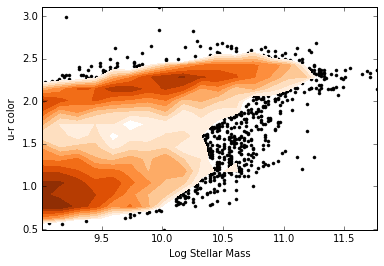

In [12]:
fig1, axcolormstar = plt.subplots()
axcolormstar = plt.axes()
scatter_contour(logmstar, urcolor, threshold=20, log_counts=True, ax=axcolormstar,
                histogram2d_args=dict(bins=20),
                plot_args=dict(marker='.', linestyle='none', color='black'),
                contour_args=dict(cmap=plt.cm.Oranges))
axcolormstar.set_xlabel("Log Stellar Mass")
axcolormstar.set_ylabel("u-r color")

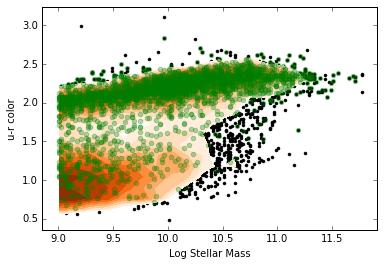

In [13]:
axcolormstar.scatter(logmstar[selearly],urcolor[selearly],color='green',alpha=0.3,s=20,zorder=10)
fig1

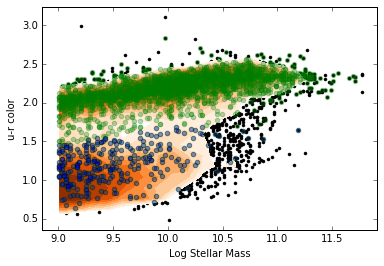

In [14]:
axcolormstar.scatter(logmstar[selblueearly],urcolor[selblueearly],alpha=0.3,s=20,zorder=10)
fig1

In [15]:
name = data['NAME']
ra = data['RADEG']
dec = data['DEDEG']
name = name[sel]
ra = ra[sel]
dec = dec[sel]
for igal in selblueearly[0]:
    print name[igal]+" %0.3f %0.3f" % (ra[igal],dec[igal])

ECO00531 157.430 20.432
ECO00881 217.540 31.216
ECO00944 176.591 20.177
ECO01041 148.797 13.429
ECO01044 149.278 5.129
ECO01065 208.897 26.694
ECO01094 180.866 22.038
ECO01136 225.938 10.710
ECO01340 135.929 29.295
ECO01674 165.199 21.591
ECO01910 194.401 28.233
ECO02081 186.860 8.843
ECO02199 172.266 9.112
ECO02212 183.677 24.981
ECO02226 182.726 25.253
ECO02359 171.764 21.233
ECO02362 182.029 22.101
ECO02372 178.707 22.103
ECO02392 169.016 22.621
ECO02408 213.416 20.932
ECO02428 170.816 24.035
ECO02476 193.968 25.183
ECO02495 211.495 17.171
ECO02521 149.251 15.556
ECO02561 177.243 20.376
ECO02660 209.958 15.587
ECO02664 236.807 10.752
ECO02673 136.438 36.355
ECO02699 199.642 17.503
ECO02719 197.551 16.936
ECO02744 145.786 13.399
ECO02778 162.850 8.661
ECO02918 174.985 16.955
ECO03045 176.360 0.004
ECO03176 137.434 7.174
ECO03187 137.915 46.640
ECO03286 180.900 8.388
ECO03319 181.290 22.008
ECO03405 182.658 17.870
ECO03408 182.684 38.336
ECO03422 182.980 40.655
ECO03455 183.660 43.536

Plug these into the SDSS DR10 (not DR12) [image list tool](http://skyserver.sdss.org/dr10/en/tools/chart/listinfo.aspx) and start exploring!